In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [16]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [3]:
model='GFDL-CM3'

experiments=[
    'historical', 
    # 'rcp85'
    ]
experiment = experiments[0]

In [4]:
folder = '/Users/cbla0002/Documents/data/cmip5/ds'
fileName = model + '_wap_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:     (plev: 8, lat: 36, time: 10950, bnds: 2, lon: 144)
Coordinates:
  * plev        (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
  * lat         (lat) float64 -35.0 -33.0 -31.0 -29.0 ... 29.0 31.0 33.0 35.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds    (time, lat, bnds) float64 ...
    lon_bnds    (time, lon, bnds) float64 ...
    time_bnds   (time, bnds) object ...
    average_T1  (time) datetime64[ns] ...
    average_T2  (time) datetime64[ns] ...
    average_DT  (time) timedelta64[ns] ...
    wap         (time, plev, lat, lon) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table day (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

In [5]:
wap = ds.wap
wap

<xarray.DataArray 'wap' (time: 10950, plev: 8, lat: 36, lon: 144)>
[454118400 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    interp_method:     conserve_order2
    units:             Pa s-1
    long_name:         wap
    cell_methods:      time: mean
    valid_range:       [100. 350.]
    standard_name:     lagrangian_tendency_of_air_pressure
    original_units:    Pa/s
    original_name:     wap
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [6]:
wap.plev

<xarray.DataArray 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
Attributes:
    positive:       down
    axis:           Z
    units:          Pa
    long_name:      pressure
    standard_name:  air_pressure

In [7]:
wap500 = wap.sel(plev=500e2)
wap500

<xarray.DataArray 'wap' (time: 10950, lat: 36, lon: 144)>
[56764800 values with dtype=float32]
Coordinates:
    plev     float64 5e+04
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    interp_method:     conserve_order2
    units:             Pa s-1
    long_name:         wap
    cell_methods:      time: mean
    valid_range:       [100. 350.]
    standard_name:     lagrangian_tendency_of_air_pressure
    original_units:    Pa/s
    original_name:     wap
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

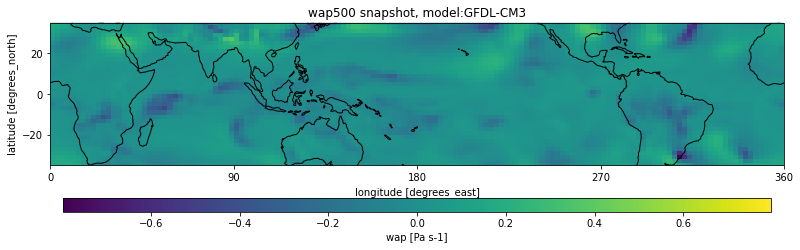

In [24]:
plot_snapshot(wap500.isel(time=0), 'viridis', 'wap500', model)

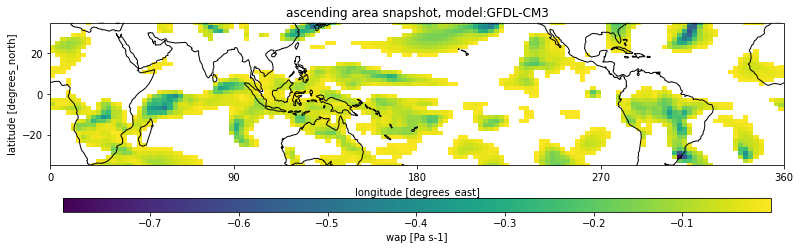

In [19]:
plot_snapshot(wap500.isel(time=0).where(wap500<0, np.nan), 'viridis', 'ascending area', model)

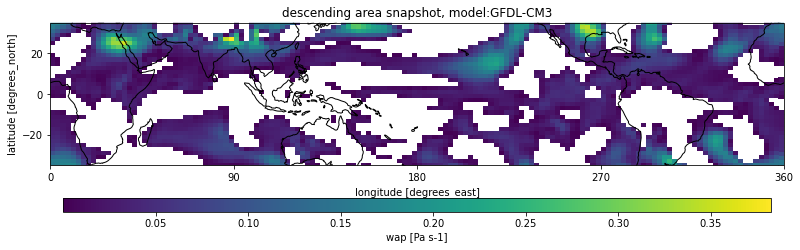

In [22]:
plot_snapshot(wap500.isel(time=0).where(wap500>0, np.nan), 'viridis', 'descending area', model)